In [1]:
# Import
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Prep

In [2]:
# Read in data
basepath = 'C:/Users/Kelsey/Desktop/jobs/TheTrevorProject/Project/data/'
bdata = pd.read_csv(basepath + 'barackobama.csv')
cdata = pd.read_csv(basepath + 'calvinstowell.csv')
kdata = pd.read_csv(basepath + 'kimkardashian.csv')

# Combine data
alldata = pd.concat([bdata, cdata, kdata])
print(alldata.shape)
alldata.head()

(6785, 5)


,created_at,handle,retweet_count,text,id
0,Mon Jun 03 20:59:36 +0000 2019,barackobama,2873,What a life. American history has always been ...,1135652276515823617
1,Thu May 30 20:12:33 +0000 2019,barackobama,13781,"A story worth sharing: Twelve years ago, Brian...",1134190885036535809
2,Thu May 30 15:17:03 +0000 2019,barackobama,4745,Exciting to see the faces of Colombia's future...,1134116519066165249
3,Mon May 27 15:26:55 +0000 2019,barackobama,43244,"On Memorial Day, we remember all those who gav...",1133031835880099840
4,Thu May 23 14:07:16 +0000 2019,barackobama,15144,Great to get out there and take a few cuts at ...,1131562241478864896


In [3]:
alldata.dtypes
# convert the 'Date' column to datetime format 
alldata['date'] = pd.to_datetime(alldata['created_at'])
alldata.head()

,created_at,handle,retweet_count,text,id,date
0,Mon Jun 03 20:59:36 +0000 2019,barackobama,2873,What a life. American history has always been ...,1135652276515823617,2019-06-03 20:59:36
1,Thu May 30 20:12:33 +0000 2019,barackobama,13781,"A story worth sharing: Twelve years ago, Brian...",1134190885036535809,2019-05-30 20:12:33
2,Thu May 30 15:17:03 +0000 2019,barackobama,4745,Exciting to see the faces of Colombia's future...,1134116519066165249,2019-05-30 15:17:03
3,Mon May 27 15:26:55 +0000 2019,barackobama,43244,"On Memorial Day, we remember all those who gav...",1133031835880099840,2019-05-27 15:26:55
4,Thu May 23 14:07:16 +0000 2019,barackobama,15144,Great to get out there and take a few cuts at ...,1131562241478864896,2019-05-23 14:07:16


In [4]:
alldata.dtypes

created_at               object
handle                   object
retweet_count             int64
text                     object
id                        int64
date             datetime64[ns]
dtype: object

### Explore Non-text Fields

In [5]:
# Summarize non-text fields
alldata.groupby(['handle']).agg({
         'id': 'count',    # Sum duration per group
         'retweet_count': [min, max, 'mean'],  # get the count of networks
         'date': [min, max]  # get the first date per group
         }
    )

## Will need to address the unbalanced classes

id retweet_count                                       date  \
              count           min      max          mean                 min   
handle                                                                         
barackobama    1000            65  1641569  19847.329000 2016-02-26 23:08:52   
calvinstowell  2590             0   594760   3699.688803 2019-04-17 19:50:55   
kimkardashian  3195             2   181971   2463.619718 2018-04-05 15:09:29   

                                   
                              max  
handle                             
barackobama   2019-06-03 20:59:36  
calvinstowell 2019-06-03 22:32:04  
kimkardashian 2019-06-03 18:04:56

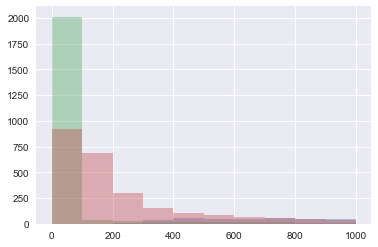

In [6]:
# Distributions of retweet_count
alldata.groupby("handle").retweet_count.hist(alpha=0.4, range=[0,1000])
plt.show()
## Lots of overlap in the lower #'s, prob not very predictive outside of Obamas huge #'s

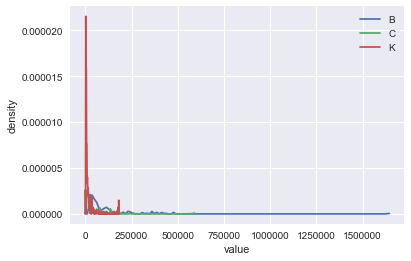

In [7]:
# KDE dists

# plot kde
sns.kdeplot(alldata.retweet_count[alldata.handle == "barackobama"],label='B');
sns.kdeplot(alldata.retweet_count[alldata.handle == "calvinstowell"],label='C');
sns.kdeplot(alldata.retweet_count[alldata.handle == "kimkardashian"],label='K');

# labels
plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [8]:
# Create vars for light pattern of life analysis
alldata['day'] = alldata.created_at.str[:3]
alldata['hour'] = alldata.created_at.str[11:13]

alldata.head()

,created_at,handle,retweet_count,text,id,date,day,hour
0,Mon Jun 03 20:59:36 +0000 2019,barackobama,2873,What a life. American history has always been ...,1135652276515823617,2019-06-03 20:59:36,Mon,20
1,Thu May 30 20:12:33 +0000 2019,barackobama,13781,"A story worth sharing: Twelve years ago, Brian...",1134190885036535809,2019-05-30 20:12:33,Thu,20
2,Thu May 30 15:17:03 +0000 2019,barackobama,4745,Exciting to see the faces of Colombia's future...,1134116519066165249,2019-05-30 15:17:03,Thu,15
3,Mon May 27 15:26:55 +0000 2019,barackobama,43244,"On Memorial Day, we remember all those who gav...",1133031835880099840,2019-05-27 15:26:55,Mon,15
4,Thu May 23 14:07:16 +0000 2019,barackobama,15144,Great to get out there and take a few cuts at ...,1131562241478864896,2019-05-23 14:07:16,Thu,14


In [9]:
pd.options.display.max_columns = None

# Distributions of hour
display(pd.crosstab(alldata.handle, alldata.hour))
# Obama slightly diff pattern (bulk of activity in 7 hour span), but otherwise not super differentiating patterns

hour,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
handle,,,,,,,,,,,,,,,,,,,,,,,,
barackobama,19,8,5,3,6,1,0,0,0,0,0,1,1,19,37,143,140,107,108,110,104,109,55,24
calvinstowell,166,173,145,137,49,8,3,1,5,18,10,59,141,183,168,158,196,163,130,136,119,144,148,130
kimkardashian,148,278,152,135,113,89,57,16,19,7,1,6,14,50,171,184,195,250,231,315,224,170,188,182


In [10]:
# Distributions of day
pd.crosstab(alldata.handle, alldata.day)
## Obama less on weekends, everyone else pr consistant

day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
handle,,,,,,,
barackobama,192,183,52,44,185,165,179
calvinstowell,391,319,303,351,392,390,444
kimkardashian,588,703,307,287,471,444,395


### Explore Text

In [45]:
# Split dataframes
# Feel like i should sample larger classes & test, but maybe not to Obama size since he is gonna be the easiest to detect?
# 1 - undersample calvin & kim's and do split on 1000 tweet corpuses
# 2 - cross validation on samples & test
# 3 - Run 2 class classification models w/ calvin & kim only and see if helps differentiate
# 4? - Markov chain obama and create more tweets, hah

## Option 1 - 80/20 of 1000 tweet samples
# Limit Calvin & Kim to random 1000
cdata_lim = cdata.sample(n=1000, random_state=1)
cdata_left = cdata.drop(cdata_lim.index)
kdata_lim = kdata.sample(n=1000, random_state=1)
kdata_left = kdata.drop(kdata_lim.index)

# Split & Combine
tb = bdata.sample(frac=0.8, random_state=1)
vb = bdata.drop(tb.index)
tc = cdata_lim.sample(frac=0.8, random_state=1)
vc = cdata_left.sample(n=200, random_state=1)
tk = kdata_lim.sample(frac=0.8, random_state=1)
vk = kdata_left.sample(n=200, random_state=1)

train1 = pd.concat([tb, tc, tk])
valid1 = pd.concat([vb, vc, vk])
all1 = pd.concat([bdata, cdata_lim, kdata_lim])


## Option 2 - different sample
# Limit Calvin & Kim to random 1000
cdata_lim = cdata.sample(n=1000, random_state=2)
cdata_left = cdata.drop(cdata_lim.index)
kdata_lim = kdata.sample(n=1000, random_state=2)
kdata_left = kdata.drop(kdata_lim.index)

# Split & Combine
tb = bdata.sample(frac=0.8, random_state=2)
vb = bdata.drop(tb.index)
tc = cdata_lim.sample(frac=0.8, random_state=2)
vc = cdata_left.sample(n=200, random_state=2)
tk = kdata_lim.sample(frac=0.8, random_state=2)
vk = kdata_left.sample(n=200, random_state=2)

train2 = pd.concat([tb, tc, tk])
valid2 = pd.concat([vb, vc, vk])
all2 = pd.concat([bdata, cdata_lim, kdata_lim])




# Current set
train = train1
valid = valid1
alldat =  all1

# Shuffle
train = train.sample(frac=1).reset_index(drop=True)
valid = valid.sample(frac=1).reset_index(drop=True)
alldat = alldat.sample(frac=1).reset_index(drop=True)

print(train.shape)
print(valid.shape)
print(alldat.shape)

alldat.head()

(2400, 5)
(600, 5)
(3000, 5)


,created_at,handle,retweet_count,text,id
0,Mon Jun 03 16:30:54 +0000 2019,calvinstowell,79,RT @danblackroyd: Dionne Warwick saying to Nik...,1135584653660774400
1,Tue Apr 05 22:13:43 +0000 2016,barackobama,992,Clean energy currently employs 2.5 million peo...,717475332190707712
2,Wed Apr 24 16:39:29 +0000 2019,calvinstowell,2021,RT @saintfadumo: 2 types of brands. https://t....,1121091301573894144
3,Thu May 02 04:37:22 +0000 2019,calvinstowell,0,@AnthonyBLSmith I would drink Paul Rudd’s bath...,1123808676165423112
4,Thu May 02 16:40:56 +0000 2019,calvinstowell,0,@ChrisDStedman @jpbrammer [REDACTED],1123990766458634240


In [46]:
import re
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['wouldnt', 'wont', 'werent', 'wasnt', 'shouldnt', 'neednt', 'isnt', 'havent', 'hasnt', 'hadnt', 'ive','doesnt', 'didnt', 'couldnt', 'arent', 'aint', 'amp'])
#stopwords

In [47]:
import string
string.punctuation
punctuation = string.punctuation + '’' + '–' + '“' + '”'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’–“”'

In [89]:
string = "i like to go, to store! https://t.co/x23mVU7808"
len(string.split())

if re.search('https?:\/\/.*', string) == None:
    print(0)
else:
    print(1)

1


In [90]:
# Text clean/transform function

def textonly(text):
    # Remove URLS
    text = re.sub('https?:\/\/.*', '', text)
    # Remove Punctuation
    text = re.sub('—', ' ', text)
    text  = "".join([char for char in text if char not in punctuation])
    # Lowercase
    text = text.lower()
    # Remove Stopwords, Tokenize
    #return [word for word in nltk.word_tokenize(text) if word not in stopwords]
    rmstops = [word for word in nltk.word_tokenize(text) if word not in stopwords]
    return  " ".join(rmstops)

# Id do this more effienciently irl...

def wordcount(text):
    # word count
    numwords = len(text.split())
    return numwords

def hasURL(text):
    # has URL
    if re.search('https?:\/\/.*', text) == None:
        hasURL = 0
    else:
        hasURL = 1
    return hasURL

#def textplus(text):
    # Create indicator for URLs & Remove (Could be interesting to unshorten & use, but not for this)
    
    # Create Punctuation features
    # Num . num , num ! num? num @ num# num% num digits num$ (.? and ! w and w/o repeated for testing) - num capitalized letters, 
    
    # Extract lists of alltime tagged handles for each acct, create indicator feature for each? = basic SNA
    
    # Remove Punctuation
    
    # Features with Emogis or treat as words?
    
    # Lowcase
    
    # Create Length features
    # # words
    
    # Remove stopwords, Tokenize
    
    # Stem?

In [ ]:
#NO
pd.options.display.max_colwidth = 500
train['text_bascln'] = train['text'].apply(lambda x: textonly(x))
train[['text', 'text_bascln']].head(10)

In [ ]:
# NO
from sklearn.preprocessing import LabelEncoder

# Encode label
y = alldat['handle']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
# alpha order - 0=barack, 1 = calvin, 2=kim

In [91]:
featureset = alldat[['handle', 'text', 'retweet_count']]
featureset['text_cln'] = featureset['text'].apply(lambda x: textonly(x))
featureset['numwords'] = featureset['text'].apply(lambda x: wordcount(x))
featureset['hasURL'] = featureset['text'].apply(lambda x: hasURL(x))

featureset.head(50)

# from sklearn.model_selection import train_test_split

# # 80-20 splitting the dataset (80%->Training and 20%->Validation)
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

c:\users\kelsey\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,handle,text,retweet_count,text_cln,numwords,hasURL
0,calvinstowell,RT @danblackroyd: Dionne Warwick saying to Nik...,79,rt danblackroyd dionne warwick saying niki tay...,24,0
1,barackobama,Clean energy currently employs 2.5 million peo...,992,clean energy currently employs 25 million peop...,16,1
2,calvinstowell,RT @saintfadumo: 2 types of brands. https://t....,2021,rt saintfadumo 2 types brands,7,1
3,calvinstowell,@AnthonyBLSmith I would drink Paul Rudd’s bath...,0,anthonyblsmith would drink paul rudds bathwate...,9,0
4,calvinstowell,@ChrisDStedman @jpbrammer [REDACTED],0,chrisdstedman jpbrammer redacted,3,0
5,kimkardashian,RT @KKWMAFIA: @KKWBEAUTY’s #FlashingLights lau...,67,rt kkwmafia kkwbeautys flashinglights launches...,12,1
6,barackobama,We asked. You answered. https://t.co/mAJvko6VqR,25802,asked answered,5,1
7,barackobama,"RT @WhiteHouse: ""A young girl shouldn't have t...",1956,rt whitehouse young girl go washington heard p...,20,1
8,kimkardashian,RT @AsyaKardashian: Happy #KUWTK day !!! https...,395,rt asyakardashian happy kuwtk day,7,1
9,kimkardashian,RT @kkwbeauty: Individual Liquid Concealers wi...,66,rt kkwbeauty individual liquid concealers rest...,18,1


In [ ]:
#NO
from sklearn.feature_extraction.text import CountVectorizer

# defining the bag-of-words transformer on the text-processed corpus # i.e., text_process() declared in II is executed...
bow_transformer=CountVectorizer(analyzer=textonly).fit(X_train)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test=bow_transformer.transform(X_test)#TEST DATA

In [92]:
import pickle

# save the model to disk
pklpath = 'C:/Users/Kelsey/Desktop/jobs/TheTrevorProject/Project/app/'
wordpkl = pklpath + 'wordfeats.pkl'

## Get original train word feats from BL model
# load BoW feat list
wordfeats = pickle.load(open(wordpkl, 'rb'))

# # Retrain Count Vectorizer model
# bow_transformer2=CountVectorizer(analyzer=textonly).fit(wordfeats)

# # Score model
# result = loaded_model.score(bow_transformer2.transform(X_test), y_test)
# print(result)

In [97]:
import sklearn_pandas
from sklearn_pandas import DataFrameMapper
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer().fit(wordfeats)

mapper = DataFrameMapper([
    (['numwords', 'hasURL'], None),
    ('text_cln',vectorizer)
])
X=mapper.fit_transform(featureset)

X

array([[24,  0,  0, ...,  0,  0,  0],
       [16,  1,  0, ...,  0,  0,  0],
       [ 7,  1,  0, ...,  0,  0,  0],
       ..., 
       [40,  0,  0, ...,  0,  0,  0],
       [20,  1,  0, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0]], dtype=int64)

In [98]:
from sklearn.preprocessing import LabelEncoder

# Encode label
y = featureset['handle']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
# alpha order - 0=barack, 1 = calvin, 2=kim
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
# NO, idk why broke
# thx https://gist.github.com/danemacaulay/c8e3194b63570de1cf88f431ade32107
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# import numpy as np
# import pandas as pd
import scipy as sp
# posts = pd.read_csv('posts.csv')

# Create vectorizer for function to use
vectorizer = CountVectorizer()
# y = posts["score"].values.astype(np.float32)

# Encode label
y = featureset['handle']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
# alpha order - 0=barack, 1 = calvin, 2=kim

X = sp.sparse.hstack((vectorizer.fit_transform(featureset.text_cln),
                      featureset[['retweet_count']].values),
                      format='csr')
X_columns = vectorizer.get_feature_names() + featureset[['retweet_count']].columns.tolist()

# print(y)

# print(featureset.head())

# print(y)

# print(X_columns)

# print(X.toarray())

In [99]:
from sklearn.model_selection import train_test_split
# Split data 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)
print(y_train)
#print(X_train.toarray())

[0 1 1 ..., 2 0 0]


In [100]:
from sklearn.naive_bayes import MultinomialNB

# instantiating the model with Multinomial Naive Bayes..
model = MultinomialNB()
# training the model...
model = model.fit(X_train, y_train)

In [101]:
# Training accuracy
model.score(X_train, y_train)

0.96458333333333335

In [102]:
# Validation accuracy
model.score(X_test, y_test)

0.85999999999999999

In [103]:
from sklearn.metrics import classification_report
 
# getting the predictions of the Validation Set...
predictions = model.predict(X_test)
# getting the Precision, Recall, F1-Score
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.99      0.90       202
          1       0.91      0.74      0.81       201
          2       0.85      0.86      0.86       197

avg / total       0.86      0.86      0.86       600



In [104]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[199,   1,   2],
       [ 26, 148,  27],
       [ 14,  14, 169]])

In [105]:
import numpy as np
cm = confusion_matrix(y_test,predictions)
# Only use the labels that appear in the data

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[ 0.98514851  0.0049505   0.00990099]
 [ 0.12935323  0.73631841  0.13432836]
 [ 0.07106599  0.07106599  0.85786802]]


In [106]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=20):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(classlabel, feat, coef)


print("Obama Important Features")
most_informative_feature_for_class(vectorizer, model, 0)
print()
print("Calvin Important Features")
most_informative_feature_for_class(vectorizer, model, 1)
print()
print("Kim Important Features")
most_informative_feature_for_class(vectorizer, model, 2)

Obama Important Features
0 voter -6.56579690991
0 amerikraut -6.54381800319
0 pepperp0tts -6.46043639425
0 dozens -6.38347535311
0 use -6.36512621445
0 climber -6.34710770894
0 hearingsvotes -6.34710770894
0 fairly -6.32940813184
0 surgeon -6.19807212978
0 changes -6.1529516945
0 cover -6.1529516945
0 gas -6.09579328066
0 judgeships -5.97801024501
0 rtmannjr -5.85067082263
0 leading -5.76728921369
0 senates -5.62752727131
0 obamacares -5.5849676569
0 presidents -5.56027504431
0 0123 -3.82137906463
0 000 -0.716023943507

Calvin Important Features
1 loveislove -7.18104257532
1 stick -7.18104257532
1 tyleroakley -7.12697535405
1 youth -7.12697535405
1 knowledge -7.07568205966
1 omw -7.07568205966
1 trumpsalert -7.02689189549
1 wants -7.02689189549
1 everyone -6.98037187985
1 reasons -6.98037187985
1 seeing -6.93592011728
1 gays -6.81331779519
1 yay -6.81331779519
1 pepperp0tts -6.73920982304
1 oneofakind -6.51606627172
1 likes -6.35784226651
1 imagine -6.26475184344
1 rtmannjr -4.76810942

In [ ]:
import pickle

# Save model
# save the model to disk
pklpath = 'C:/Users/Kelsey/Desktop/jobs/TheTrevorProject/Project/app/'
modelpkl = pklpath + 'finalized_model.pkl'
pickle.dump(model, open(modelpkl, 'wb'))

# save BoW feature list
wordpkl = pklpath + 'wordfeats.pkl'
pickle.dump(bow_transformer.get_feature_names(), open(wordpkl, 'wb'))

In [ ]:
# some time later...

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(bow_transformer.transform(X_test), y_test)
# print(result)

# load the model from disk
loaded_model = pickle.load(open(modelpkl, 'rb'))

# load BoW feat list
wordfeats = pickle.load(open(wordpkl, 'rb'))

# Retrain Count Vectorizer model
bow_transformer2=CountVectorizer(analyzer=textonly).fit(wordfeats)

# Score model
result = loaded_model.score(bow_transformer2.transform(X_test), y_test)
print(result)

In [ ]:
# Predict for a single input
type(X_test)
testcase = "Don’t make time for people who don’t make time for you. https://t.co/5iSinrlCz1"
testcase = "Don’t make time for people who don’t make time for you. https://t.co/5iSinrlCz1"
# print(loaded_model.predict_proba(bow_transformer.transform([testcase]))) 
# print(loaded_model.predict(bow_transformer.transform([testcase]))) 

probests = loaded_model.predict_proba(bow_transformer2.transform([testcase])) # Probability estimates for each class
print(probests)
prediction = loaded_model.predict(bow_transformer2.transform([testcase]))
print(prediction)

In [ ]:
probests[0][0] > .9
float(sum(probests[0]) - probests[0][0]) < .1

def howsure(probests, prediction):
    '''Defines logic to translate class probability estimates to sureness gif'''
    predclass = prediction
    probpred = probests[0][prediction]
    otherprobs = float(sum(probests[0]) - probpred)
    # Not sure
    if probpred < .7:
        return "not sure."
    # Very sure
    elif probpred > .9 and otherprobs < .1:
        return "very sure!"
    else:
        return "kinda sure."
    
howsure(probests, prediction)

In [ ]:
# Predict & display readable
originallabels = {0: '@barackobama', 1: '@calvinstowell', 2: '@kimkardashian'}

print(originallabels[loaded_model.predict(bow_transformer2.transform([testcase]))[0]])

In [ ]:
print(len(X_test))
print(len(y_test))
print(len(predictions))

df = pd.DataFrame()
df['X'] = X_test
df["actual"] = y_test
df["predicted"] = predictions

# Look at misclassifieds
df[df['actual'] != df['predicted']]

In [ ]:
df.head()


In [ ]:
import codecs, re, time
from itertools import chain

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

trainfile = 'train.txt'

# Vectorizing data.
train = []
word_vectorizer = CountVectorizer(analyzer='word')
trainset = word_vectorizer.fit_transform(codecs.open(trainfile,'r','utf8'))
tags = ['bs','pt','es','sr']

# Training NB
mnb = MultinomialNB()
mnb.fit(trainset, tags)

def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print classlabel, feat, coef



most_informative_feature_for_class(word_vectorizer, mnb, 'bs')
print 
most_informative_feature_for_class(word_vectorizer, mnb, 'pt')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countVectorizer = CountVectorizer(analyzer=textonly) 
countVector = countVectorizer.fit_transform(train['text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()